# Henry Pham
# Project 8 - Predicting Bank Customer Churn

In [1]:
# ---- Project 8 ----

## Introduction

In [2]:
# The aim of this project is to develop an accurate and actionable predictive model for forecasting bank customer churn, 
# assisting financial institutions in retaining customers and enhancing customer satisfaction. 
# Accurate predictions of customer churn are pivotal for banks and financial institutions seeking to proactively address attrition, 
# improve customer engagement, and optimize retention strategies. 
# By harnessing the power of predictive analytics and historical customer data, this project seeks to provide valuable insights 
# and predictive capabilities that can bolster customer relationship management in the banking sector.

## Data Sources

In [3]:
# Bank Customer Churn: https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv

## Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

## Get Bank Customer Churn Data

In [5]:
# Import few libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\PracticeMachineLearning\\Churn_Modelling.csv')

## Data Cleaning

In [7]:
# Show few records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Find shape of the dataset 

In [8]:
# Retrieve the dimensions of a DataFrame df
df.shape

(10000, 14)

In [9]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 10000
Number of Columns 14


## Get information About the dataset

In [10]:
# Provide a concise summary of the DataFrame df, including information about the index, column data types, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Check missing values

In [11]:
# Calculate the number of missing values (null values) in each column of the DataFrame df
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# There is no missing values in the dataset.

## Check duplicates

In [13]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

0

In [14]:
# There is no duplicates

## Get an overall stats summary

In [15]:
# Generate descriptive statistics of the numerical columns in a DataFrame.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dropping Irrelevant Features

In [16]:
# RowNumber, CustomerId, CustomerId: They do not provide any meaningful information related to the target variable.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Outliers Detection

In [18]:
# Subset the data for the variable of Balance
bal = df['Balance']

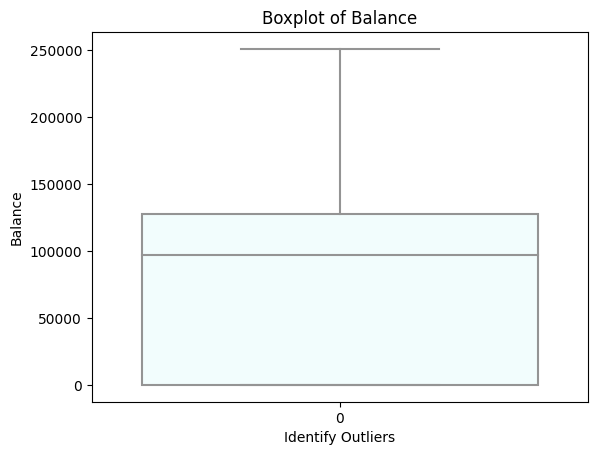

In [19]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of GRE score using seaborn
sns.boxplot(bal, color='azure')

# Add a title
plt.title("Boxplot of Balance")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Balance")

# Show the plot
plt.show()

In [20]:
# I calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [21]:
# Calculate the mean, median, and standard deviation for Balance
mean = bal.mean()
median = bal.median()
std = bal.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (bal - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "bal" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = bal[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: Balance, dtype: float64)


In [22]:
# There is no outliers for Balance in the z-scores method.

In [23]:
# Subset the data for the variable of EstimatedSalary
sal = df['EstimatedSalary']

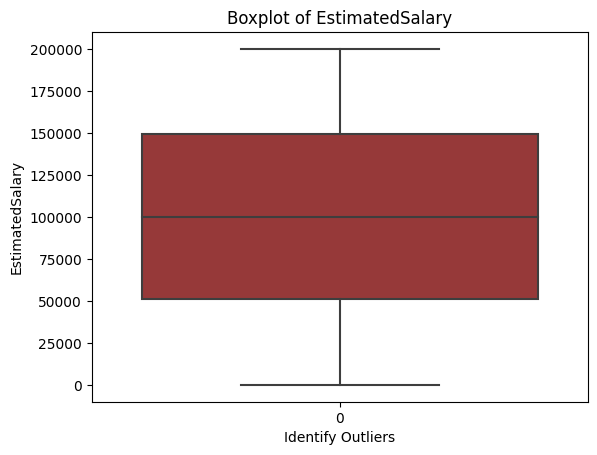

In [24]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of GRE score using seaborn
sns.boxplot(sal, color='brown')

# Add a title
plt.title("Boxplot of EstimatedSalary")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("EstimatedSalary")

# Show the plot
plt.show()

In [25]:
# I calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [26]:
# Calculate the mean, median, and standard deviation for Balance
mean = sal.mean()
median = sal.median()
std = sal.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (sal - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "sal" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = sal[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: EstimatedSalary, dtype: float64)


In [27]:
# There is no outliers for EstimatedSalary in the z-scores method.

## Data Analysis

In [28]:
# List columns
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
# Count unique value in column Geography column
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

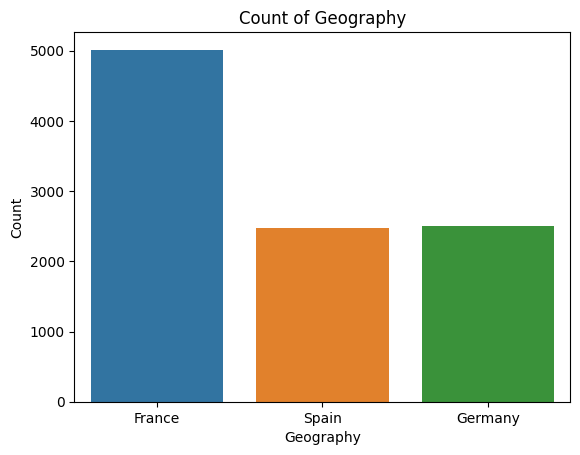

In [30]:
# Import few libraries
import seaborn as sns
import matplotlib.pyplot as plt
# This line creates a count plot using seaborn's countplot function
sns.countplot(x='Geography', data=df)
# These lines set the title, x-axis label, and y-axis label for the plot using matplotlib's title, xlabel, and ylabel functions, respectively.
plt.title('Count of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
# Display the plot
plt.show()

In [31]:
# There are more French customers than Germany and Spain customers

In [32]:
# Compute the frequency count of unique values in the 'Exited' column of the DataFrame df. 
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

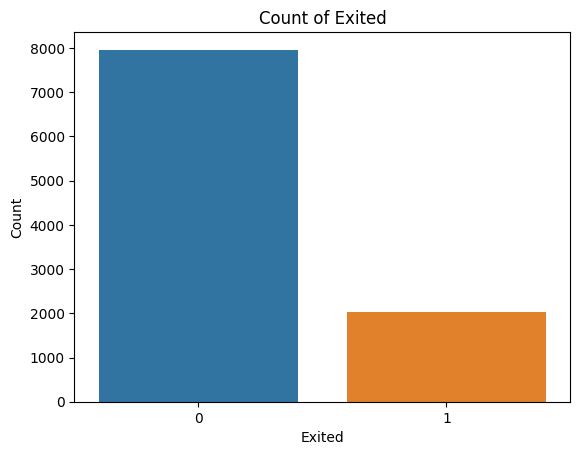

In [33]:
# Import few libraries
import seaborn as sns
import matplotlib.pyplot as plt
# This line creates a count plot using seaborn's countplot function
sns.countplot(x='Exited', data=df)
# These lines set the title, x-axis label, and y-axis label for the plot using matplotlib's title, xlabel, and ylabel functions, respectively.
plt.title('Count of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
# Display the plot
plt.show()

In [34]:
# There is an imbalanced exited counts in the dataset

## Encoding Categorical Data

In [35]:
# Create dummy variables for categorical columns in the DataFrame df using one-hot encoding and 
# drops the first level of each categorical variable to avoid multicollinearity issues.
df = pd.get_dummies(df,drop_first=True)

In [36]:
# Show few records
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Store Feature Matrix In X and Response(Target) In Vector y

In [37]:
# This line creates a new DataFrame X by dropping the column labeled 'Exited ' from the original DataFrame df
X = df.drop('Exited',axis=1)
# This line creates a Series y containing only the values from the column labeled 'Exited' in the original DataFrame df.
# The resulting Series y contains the values of the 'Exited' column, which is the target variable I want to predict.
y = df['Exited']

## Handling Imbalanced Data With SMOTE

In [38]:
# This line imports the SMOTE class from the imbalanced-learn library, 
# which provides a set of tools for dealing with imbalanced datasets in machine learning.
from imblearn.over_sampling import SMOTE
# This line applies SMOTE to the feature matrix X and target vector y. 
# The fit_resample() method of the SMOTE class is called to perform the oversampling. 
X_res,y_res = SMOTE().fit_resample(X,y)

In [39]:
# Show count of unique values
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Splitting The Dataset Into The Training Set And Test Set

In [40]:
# Import the train_test_split function from the sklearn.model_selection module and 
# then splits the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# X: This is the DataFrame containing the features (independent variables).
# y: This is the Series containing the target variable (dependent variable).
# test_size=0.20: This parameter specifies the proportion of the dataset that should be included in the test split. 
# In this case, it's set to 0.20, meaning that 20% of the data will be used for testing, 
# and the remaining 80% will be used for training.
# random_state=42: This parameter sets the random seed for reproducibility
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

## Feature Scaling

In [41]:
# This line imports the StandardScaler class from the sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler
# This line creates an instance of the StandardScaler class and assigns it to the variable sc. 
sc = StandardScaler()

In [42]:
# This line standardizes the training features (X_train) by fitting the StandardScaler (sc) 
# to the training data and transforming it. 
X_train=sc.fit_transform(X_train)
# This line standardizes the testing features (X_test) using the mean and standard deviation calculated from the training set.
X_test=sc.transform(X_test)

In [43]:
# Show the result of X_train
X_train

array([[ 1.49186996, -0.39901926,  0.0758692 , ...,  1.73495602,
        -0.46137976, -0.84962009],
       [ 1.09942235,  0.10143412, -1.40150735, ..., -0.57638349,
        -0.46137976,  1.17699664],
       [ 0.14010595, -0.69929129, -0.66281907, ...,  1.73495602,
        -0.46137976, -0.84962009],
       ...,
       [ 0.20551389,  0.2015248 ,  1.18390161, ..., -0.57638349,
        -0.46137976,  1.17699664],
       [ 1.40465938,  0.6018875 , -0.66281907, ..., -0.57638349,
        -0.46137976, -0.84962009],
       [ 0.53255357,  1.00225021, -1.40150735, ...,  1.73495602,
        -0.46137976,  1.17699664]])

In [44]:
# Show the result of X_test
X_test

array([[-1.23346070e+00, -1.19974467e+00,  7.58692000e-02, ...,
        -5.76383486e-01, -4.61379765e-01, -8.49620094e-01],
       [-4.59466790e-01,  1.34344628e-03, -2.93474937e-01, ...,
         1.73495602e+00, -4.61379765e-01, -8.49620094e-01],
       [ 3.47231085e-01, -9.99563317e-01,  1.55324575e+00, ...,
        -5.76383486e-01,  2.16741192e+00, -8.49620094e-01],
       ...,
       [ 1.07401987e-01, -2.98928583e-01,  4.45213337e-01, ...,
        -5.76383486e-01, -4.61379765e-01, -8.49620094e-01],
       [ 1.11032367e+00,  1.10234089e+00,  4.45213337e-01, ...,
         1.73495602e+00, -4.61379765e-01, -8.49620094e-01],
       [ 3.36329762e-01,  1.40261292e+00, -1.03216321e+00, ...,
        -5.76383486e-01, -4.61379765e-01,  1.17699664e+00]])

## Import The models

In [45]:
# Import few libraries
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

## Model Training & Evaluation

In [46]:
# This line creates an instance of the LogisticRegression class from scikit-learn's linear_model module
lr = LogisticRegression()
# This line trains the logistic regression model (lr) on the training data (X_train and y_train) using the fit method
lr.fit(X_train,y_train)
# This line uses the trained logistic regression model (lr) to predict the labels for the test data (X_test) using the predict method. 
y_pred_lr= lr.predict(X_test)
# Print the result
print('Accuacy score of lr:', accuracy_score(y_test,y_pred_lr))
print('Precision score of lr:', precision_score(y_test,y_pred_lr))

Accuacy score of lr: 0.7818581293157565
Precision score of lr: 0.7715189873417722


In [47]:
# Repeat the same for SVM
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('Accuacy score of svm:', accuracy_score(y_test,y_pred_svm))
print('Precision score of svm:', precision_score(y_test,y_pred_svm))

Accuacy score of svm: 0.8345888261142499
Precision score of svm: 0.8292682926829268


In [48]:
# Repeat the same for KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('Accuacy score of knn:', accuracy_score(y_test,y_pred_knn))
print('Precision score of knn:', precision_score(y_test,y_pred_knn))

Accuacy score of knn: 0.8129315756434401
Precision score of knn: 0.7973896830329397


In [49]:
# Repeat the same for Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Accuacy score of dt:', accuracy_score(y_test,y_pred_dt))
print('Precision score of dt:', precision_score(y_test,y_pred_dt))

Accuacy score of dt: 0.7937853107344632
Precision score of dt: 0.7741738066095472


In [50]:
# Repeat the same for RF
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Accuacy score of rf:', accuracy_score(y_test,y_pred_rf))
print('Precision score of rf:', precision_score(y_test,y_pred_rf))

Accuacy score of rf: 0.8524795982423101
Precision score of rf: 0.8451242829827916


In [51]:
# Repeat the same for GBC
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred_gr = gr.predict(X_test)
print('Accuacy score of gr:', accuracy_score(y_test,y_pred_gr))
print('Precision score of gr:', precision_score(y_test,y_pred_gr))

Accuacy score of gr: 0.8430634023854363
Precision score of gr: 0.8434442270058709


In [52]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'ACC_SCORE') 
# and the values are lists containing the corresponding data.
df_acc = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC_SCORE':[accuracy_score(y_test,y_pred_lr),
                                       accuracy_score(y_test,y_pred_svm),
                                       accuracy_score(y_test,y_pred_knn),
                                       accuracy_score(y_test,y_pred_dt),
                                       accuracy_score(y_test,y_pred_rf),
                                       accuracy_score(y_test,y_pred_gr)]})

In [53]:
# Show the result
df_acc

,Models,ACC_SCORE
0,LR,0.781858
1,SVC,0.834589
2,KNN,0.812932
3,DT,0.793785
4,RF,0.852480
5,GBC,0.843063


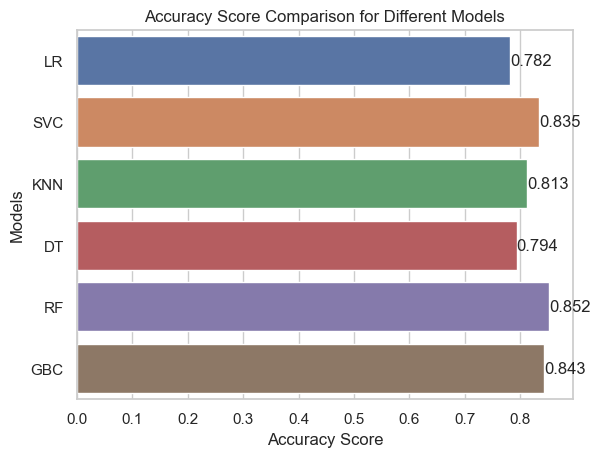

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='ACC_SCORE', y='Models', data=df_acc)

# Adding labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Accuracy Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_acc.iterrows():
    ax.text(row['ACC_SCORE'], index, f'{row["ACC_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [55]:
# The Random Forest model is the best model.

In [56]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'Precision Score') 
# and the values are lists containing the corresponding data.
df_prec = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'Precision_SCORE':[precision_score(y_test,y_pred_lr),
                                       precision_score(y_test,y_pred_svm),
                                       precision_score(y_test,y_pred_knn),
                                       precision_score(y_test,y_pred_dt),
                                       precision_score(y_test,y_pred_rf),
                                       precision_score(y_test,y_pred_gr)]})

In [57]:
# Show the result
df_prec

,Models,Precision_SCORE
0,LR,0.771519
1,SVC,0.829268
2,KNN,0.797390
3,DT,0.774174
4,RF,0.845124
5,GBC,0.843444


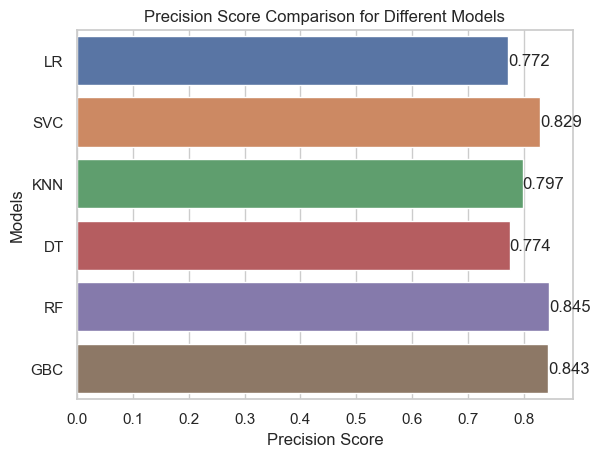

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='Precision_SCORE', y='Models', data=df_prec)

# Adding labels and title
plt.xlabel('Precision Score')
plt.ylabel('Models')
plt.title('Precision Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_prec.iterrows():
    ax.text(row['Precision_SCORE'], index, f'{row["Precision_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [59]:
# The Random Forest model is indeed the best model.

## Save The Model

In [60]:
# This line creates an instance of the RandomForestClassifier class from the ensemble module in scikit-learn.
rf = RandomForestClassifier()
# This line trains (fits) the RandomForestClassifier model on the entire dataset X and 
# corresponding target variable y using the fit method.
rf.fit(X,y)

RandomForestClassifier()

In [61]:
# Import the joblib library
import joblib
# This line saves the trained RandomForestClassifier model (rf) to a file named 'Bank_Customer_Churn_model'. 
joblib.dump(rf,'Bank_Customer_Churn_model')

['Bank_Customer_Churn_model']

In [62]:
# This line loads the previously saved model from the file 'Bank_Customer_Churn_model' and assigns it to the variable 'model'. 
# I can now use this model to make predictions on new data 
model = joblib.load('Bank_Customer_Churn_model')